In [13]:
from google.colab import drive
import pandas as pd
import numpy as np
import re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence

from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [14]:
drive.mount('/content/drive', force_remount = True)
root_dir = '/content/drive/MyDrive/Toxic_comment_classification_Maggio_Monti/dataset/'
train_augmented_balanced = pd.read_csv(root_dir + 'dataset_augmented/train_augmented_balanced.csv', index_col=0)
train_augmented = pd.read_csv(root_dir + 'dataset_augmented/train_augmented.csv', index_col=0)
train = pd.read_csv(root_dir + 'dataset_clean/train_clean.csv', index_col=0)
test = pd.read_csv(root_dir + 'dataset_clean/test_clean.csv', index_col=0)

Mounted at /content/drive


In [15]:
train_augmented_balanced['comment_text'] = train_augmented_balanced['comment_text'].astype(str)
train_augmented['comment_text'] = train_augmented['comment_text'].astype(str)
train['comment_text'] = train['comment_text'].astype(str)
test['comment_text'] = test['comment_text'].astype(str)

In [16]:
x_train_augmented_balanced = train_augmented_balanced["comment_text"].values
x_train_augmented = train_augmented["comment_text"].values
x_train = train["comment_text"].values
x_test  = test["comment_text"].values

y_train_augmented_balanced = train_augmented_balanced[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_train_augmented = train_augmented[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

# tokenizing the data
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(np.concatenate((x_train_augmented_balanced, x_train_augmented, x_train,x_test))))

# turning the tokenized text into sequences
x_train_augmented_balanced = tokenizer.texts_to_sequences(x_train_augmented_balanced)
x_train_augmented = tokenizer.texts_to_sequences(x_train_augmented)
x_train = tokenizer.texts_to_sequences(x_train)
x_test  = tokenizer.texts_to_sequences(x_test)

## Balanced Augmented training dataset

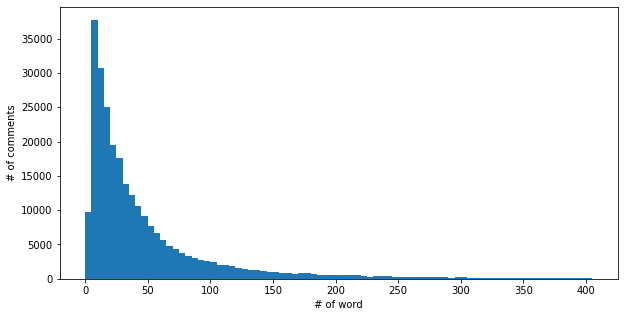

In [17]:
totalNumWords = [len(one_comment) for one_comment in x_train_augmented_balanced]
plt.figure(figsize=(10,5))
plt.hist(totalNumWords,bins = np.arange(0,410,5)) 
plt.xlabel('# of word')
plt.ylabel('# of comments')
plt.show()

## Augmented training dataset

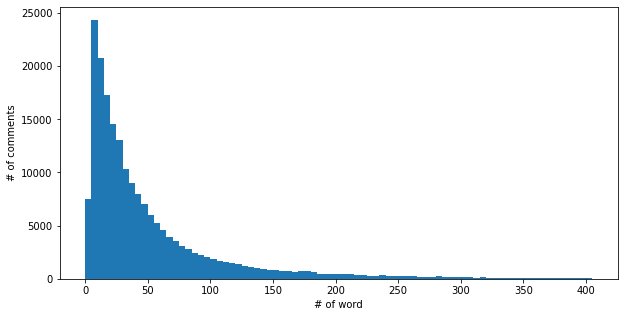

In [18]:
totalNumWords = [len(one_comment) for one_comment in x_train_augmented]
plt.figure(figsize=(10,5))
plt.hist(totalNumWords,bins = np.arange(0,410,5)) 
plt.xlabel('# of word')
plt.ylabel('# of comments')
plt.show()

## Basic training dataset

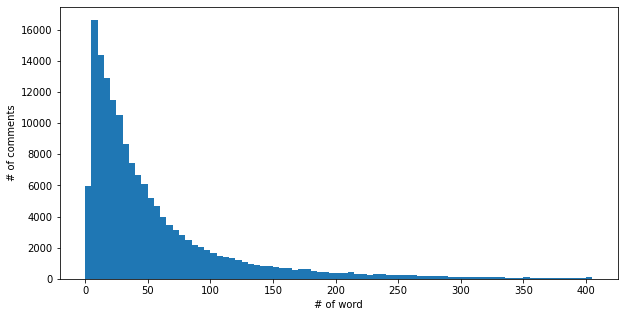

In [19]:
totalNumWords = [len(one_comment) for one_comment in x_train]
plt.figure(figsize=(10,5))
plt.hist(totalNumWords,bins = np.arange(0,410,5)) 
plt.xlabel('# of word')
plt.ylabel('# of comments')
plt.show()

In [20]:
# padding the sequences
x_train_augmented_balanced = sequence.pad_sequences(x_train_augmented_balanced, maxlen=128)
x_train_augmented = sequence.pad_sequences(x_train_augmented, maxlen=128)
x_train = sequence.pad_sequences(x_train, maxlen=128)
x_test  = sequence.pad_sequences(x_test,  maxlen=128)

print('x_train_augmented_balanced shape:', x_train_augmented_balanced.shape)
print('x_train_augmented shape:', x_train_augmented.shape)
print('x_train shape:', x_train.shape)
print('x_test shape: ', x_test.shape)

x_train_augmented_balanced shape: (269571, 128)
x_train_augmented shape: (199131, 128)
x_train shape: (159571, 128)
x_test shape:  (63978, 128)


## saving the datasets

Balanced augmented training dataset

In [21]:
np.savetxt(root_dir + "/dataset_preprocessed/x_train_augmented_balanced.csv", x_train_augmented_balanced, delimiter=",")
np.savetxt(root_dir + "/dataset_preprocessed/y_train_augmented_balanced.csv", y_train_augmented_balanced, delimiter=",")

Augmented training dataset

In [22]:
np.savetxt(root_dir + "/dataset_preprocessed/x_train_augmented.csv", x_train_augmented, delimiter=",")
np.savetxt(root_dir + "/dataset_preprocessed/y_train_augmented.csv", y_train_augmented, delimiter=",")

basic training dataset


In [23]:
np.savetxt(root_dir + "/dataset_preprocessed/x_train.csv", x_train, delimiter=",")
np.savetxt(root_dir + "/dataset_preprocessed/y_train.csv", y_train, delimiter=",")


test dataset

In [24]:
np.savetxt(root_dir + "/dataset_preprocessed/x_test.csv", x_test, delimiter=",")
np.savetxt(root_dir + "/dataset_preprocessed/y_test.csv", y_test, delimiter=",")